# Code to make UE dataset

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import poisson
from matplotlib import pyplot as plt
import datetime
from datetime import timedelta
import seaborn as sns
import random

## Main Fuction to generate Data

This fuction assusmes that 
 - The resource utilization of a service has a poission distribution
 - The mean of this distribution is different during peak hours and non peak hours
 - The services have only one peak hour window

In [2]:
# This fuction is used to create the compute requirements of 
# a service during a day
# It takes in 2 tuples
# hightime: Tuple of lists where each list is start and end of 
#           busytime
# lowtime: Tuple of lists where each list is start and end of 
#           busytime
def dataGen(highTime:list,highTimeMean=70,lowTimeMean=0,workDay=True):
    data = []
    if workDay:
        data+=list(poisson.rvs(mu=lowTimeMean, size=highTime[0][0]*60)/100)
        data+=list(poisson.rvs(mu=highTimeMean, size=((highTime[0][1]-highTime[0][0]))*60)/100)
        data+=list(poisson.rvs(mu=lowTimeMean, size=((highTime[1][0]-highTime[0][1])+1)*60)/100)
        data+=list(poisson.rvs(mu=highTimeMean, size=((highTime[1][1]-highTime[1][0]))*60)/100)
        data+=list(poisson.rvs(mu=lowTimeMean, size=(24-highTime[1][1]-1)*60)/100)
    else:
        data+=list(poisson.rvs(mu=lowTimeMean, size=24*60)/100)
    return data
    

## How the data will look

In [3]:
data = dataGen([[8,10],[17,19]])
# for _ in range(7):
#     data+=dataGen([[8,10],[17,19]])  # The peak hours are between 8 am and 5pm

In [4]:
synthetic = pd.DataFrame({"Active": data})
synthetic.index = pd.date_range(start="2021-07-01", periods=len(data), freq="min")

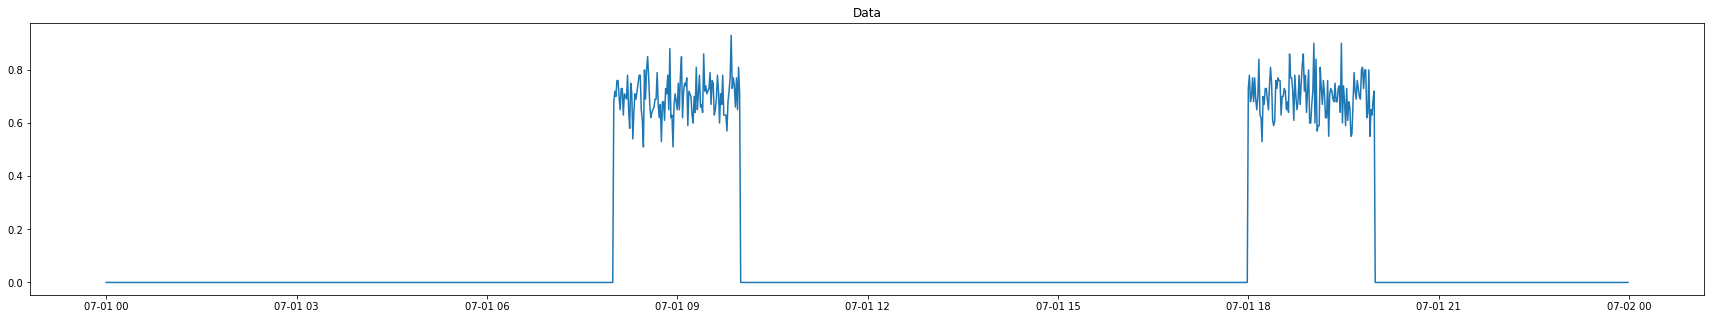

In [5]:
fig = plt.figure(figsize=(30,5))
plt.plot(synthetic.index, synthetic['Active'])
# plt.xticks(rotation=90)
plt.title("Data")
plt.show()

## Dataset with dates

Dataset for a single service generated for 3 years

In [6]:
distriList = []
# date_df = pd.DataFrame({'Date':pd.date_range(start="2021-01-01", end="2022-01-01", freq="D")})
date_df = pd.DataFrame({'Date':pd.date_range(start="2020-01-01", end="2022-01-01", freq="D")})

In [7]:
date_df.shape

(732, 1)

In [8]:
for i in range(len(date_df)):
    if date_df.loc[i,'Date'].strftime('%A') in ['Saturday', 'Sunday']:
        distriList+=dataGen([[8,10],[17,19]],workDay=False)
    else:
        distriList+=dataGen([[8,10],[17,19]])

In [9]:
# [date.strftime('%A') for date in date_df['Date'][:8]]

In [10]:
# date_df.loc[5,'Date']

In [11]:
len(distriList)

1054080

In [12]:
len(pd.date_range(start="2020-01-01", end="2022-01-02", freq="T")[:-1])

1054080

In [13]:
# dateList = pd.date_range(start="2021-01-01", end="2022-01-02", freq="T")[:-1]
dateList = pd.date_range(start="2020-01-01", end="2022-01-02", freq="T")[:-1]
final_df = pd.DataFrame({"Compute": distriList,'Date:':dateList})
# final_df.index = pd.date_range(start="2021-01-01", end="2022-01-01", freq="min")[:-1]

In [14]:
final_df.set_index('Date:',inplace=True)

In [15]:
final_df

,Compute
Date:,
2020-01-01 00:00:00,0.0
2020-01-01 00:01:00,0.0
2020-01-01 00:02:00,0.0
2020-01-01 00:03:00,0.0
2020-01-01 00:04:00,0.0
...,...
2022-01-01 23:55:00,0.0
2022-01-01 23:56:00,0.0
2022-01-01 23:57:00,0.0


In [16]:
24*60

1440

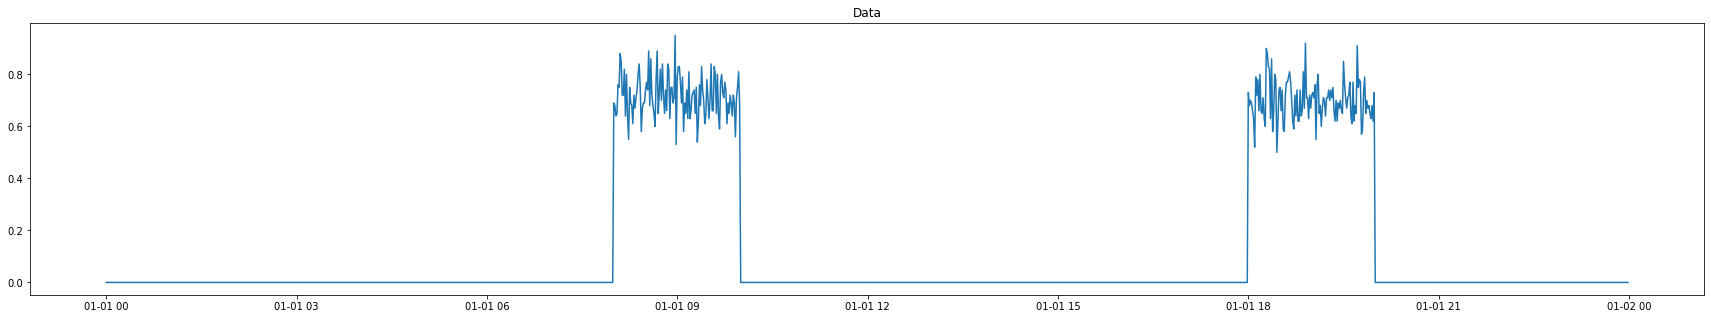

In [17]:
# Plot a part of the data - 10 days
fig = plt.figure(figsize=(30,5))
plt.plot(final_df[:1440].index, final_df[:1440]['Compute'])
# plt.xticks(rotation=90)
plt.title("Data")
plt.show()

## Complete Dataset
Lets consider the following services

In [18]:
# hospitaf_df = pd.DataFrame({'services':['Registration','Nurse Station','ED','Imaging','OR','ICU','Patient Room','Lab','Pharmacy'],
#                             'MaxCompute':[100, 100, 100, 100, 100, 100, 100, 100, 100],
#                             'LowtimeMean':[10, 40, 60, 20, 80, 80, 80, 20, 50],
#                             'HightimeMean':[80, 80, 80, 80, 80, 80, 80, 80, 80],
#                             'Hightime':[[8,17], [8,17], [8,17], [8,17], [8,17], [8,17], [8,17], [12,17], [12,17]]
#                            })

## Creating the complete Hospital Dataset

In [19]:
# def datasetHelper(df:pd.DataFrame,start="2020-01-01", end="2022-01-01"):
#     Final_df = pd.DataFrame(columns=['services', 'Date', 'Compute'])
#     for i in range(len(df)):
#         distriList = []
#         service = [df.loc[i,'services']]
#         date_df = pd.DataFrame({'Date':pd.date_range(start=start, end=end, freq="D")})
# #         print(len(date_df)*24*60)
        
#         for j in range(len(date_df)):
#             if date_df.loc[j,'Date'].strftime('%A') in ['Saturday', 'Sunday']:
#                 distriList+=dataGen(df['Hightime'][i],highTimeMean=df.loc[i,'HightimeMean'],lowTimeMean=df.loc[i,'LowtimeMean'], workDay=False)
#             else:
#                 distriList+=dataGen(df['Hightime'][i], highTimeMean=df.loc[i,'HightimeMean'],lowTimeMean=df.loc[i,'LowtimeMean'])
# #         print(start,end)
#         newEnd = datetime.datetime.strptime(end, '%Y-%m-%d') + timedelta(days=1)
# #         print(newEnd)
#         dateList = pd.date_range(start=start, end=newEnd, freq="T")[:-1]
# #         print(dateList[:5])
# #         print(len(distriList),len(dateList),len([i]*len(distriList)))
#         final_df = pd.DataFrame({"Compute": distriList,'Date':dateList,'services':service*len(distriList)})
        
#         Final_df = pd.concat([Final_df,final_df])
# #         Final_df = pd.merge(Final_df,final_df,on='Date')
    
#     Final_df.set_index('Date',inplace=True)
#     return Final_df
        
        

In [20]:
def datasetHelper_wide(deviceCount=10, start="2020-01-01", end="2022-01-01"):
#     The pairs of high times in a day - [[10,11],[20,21]]
    HighTimes = [[[6,8],[17,19]],[[7,8],[17,18]],[[9,11],[19,21]],[[10,11],[20,21]],[[4,12],[16,23]]]
    Final_df = pd.DataFrame(columns=['Date'])
    newEnd = datetime.datetime.strptime(end, '%Y-%m-%d') + timedelta(days=1)
    dateList = pd.date_range(start=start, end=newEnd, freq="T")[:-1]
    Final_df['Date'] = dateList
    for i in range(deviceCount):
        ht = random.choice(HighTimes)
        distriList = []
        
        service = ['D'+str(i)]
        date_df = pd.DataFrame({'Date':pd.date_range(start=start, end=end, freq="D")})

        
        for j in range(len(date_df)):
            if date_df.loc[j,'Date'].strftime('%A') in ['Saturday', 'Sunday']:
                distriList+=dataGen(ht,highTimeMean=70,lowTimeMean=0, workDay=False)
            else:
                distriList+=dataGen(ht, highTimeMean=70,lowTimeMean=0)

        compute = random.choice([5,6,7,8,9,10])
        final_df = pd.DataFrame({str(service[0]): distriList,
                                 'Date':dateList, 
                                 'Compute_'+str(service[0]):compute,
                                 'Compute_Available_'+str(service[0]):[compute*d for d in distriList]})

        Final_df = pd.merge(Final_df,final_df,on='Date')
    
    Final_df.set_index('Date',inplace=True)
    return Final_df

In [21]:
Dataset = datasetHelper_wide(deviceCount=50)

In [22]:
Dataset

,D0,Compute_D0,Compute_Available_D0,D1,Compute_D1,Compute_Available_D1,D2,Compute_D2,Compute_Available_D2,D3,...,Compute_Available_D46,D47,Compute_D47,Compute_Available_D47,D48,Compute_D48,Compute_Available_D48,D49,Compute_D49,Compute_Available_D49
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0.0,5,0.0,0.0,6,0.0,0.0,8,0.0,0.0,...,0.0,0.0,5,0.0,0.0,9,0.0,0.0,9,0.0
2020-01-01 00:01:00,0.0,5,0.0,0.0,6,0.0,0.0,8,0.0,0.0,...,0.0,0.0,5,0.0,0.0,9,0.0,0.0,9,0.0
2020-01-01 00:02:00,0.0,5,0.0,0.0,6,0.0,0.0,8,0.0,0.0,...,0.0,0.0,5,0.0,0.0,9,0.0,0.0,9,0.0
2020-01-01 00:03:00,0.0,5,0.0,0.0,6,0.0,0.0,8,0.0,0.0,...,0.0,0.0,5,0.0,0.0,9,0.0,0.0,9,0.0
2020-01-01 00:04:00,0.0,5,0.0,0.0,6,0.0,0.0,8,0.0,0.0,...,0.0,0.0,5,0.0,0.0,9,0.0,0.0,9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01 23:55:00,0.0,5,0.0,0.0,6,0.0,0.0,8,0.0,0.0,...,0.0,0.0,5,0.0,0.0,9,0.0,0.0,9,0.0
2022-01-01 23:56:00,0.0,5,0.0,0.0,6,0.0,0.0,8,0.0,0.0,...,0.0,0.0,5,0.0,0.0,9,0.0,0.0,9,0.0
2022-01-01 23:57:00,0.0,5,0.0,0.0,6,0.0,0.0,8,0.0,0.0,...,0.0,0.0,5,0.0,0.0,9,0.0,0.0,9,0.0


<AxesSubplot:xlabel='Date'>

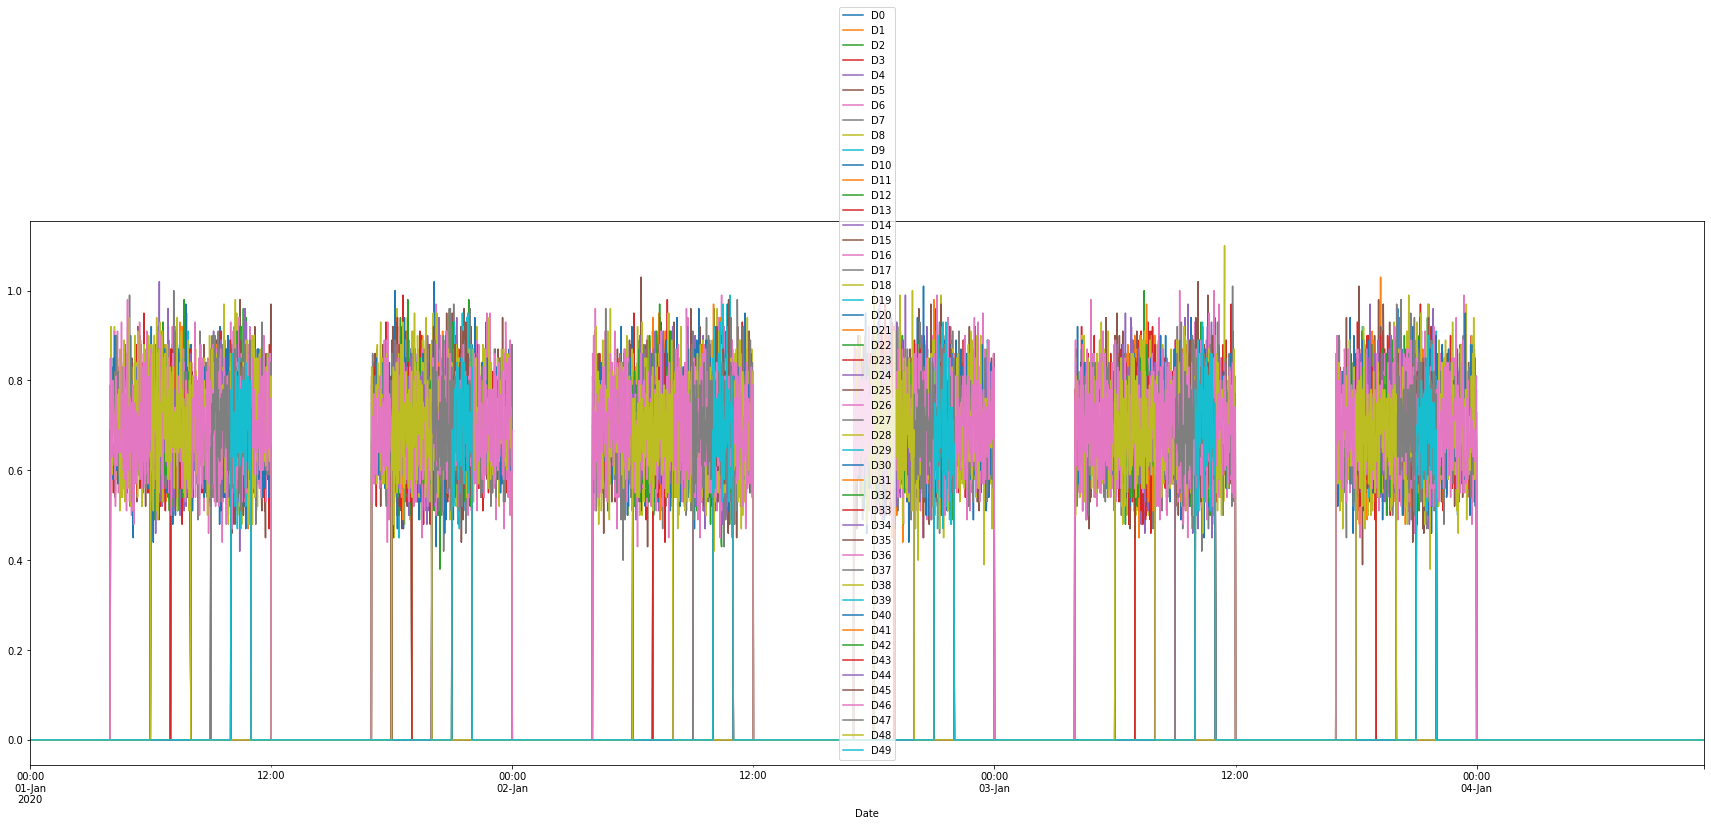

In [23]:
Dataset[:5000].plot(y=[Dataset.columns[x] for x in range(0,len(Dataset.columns),3) ],figsize=(30, 10))

<AxesSubplot:xlabel='Date'>

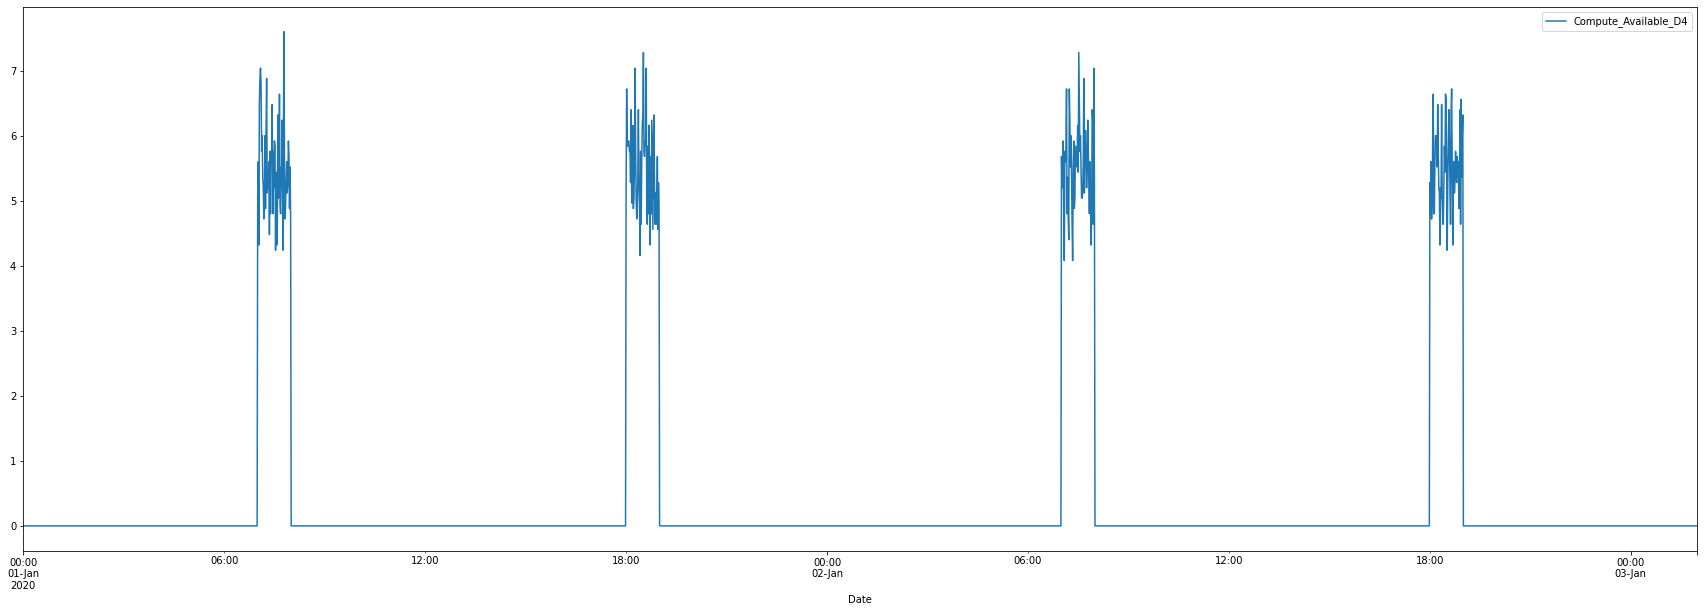

In [24]:
Dataset[:3000].plot(y=Dataset.columns[14],figsize=(30, 10))

In [25]:
Dataset.head(2)

,D0,Compute_D0,Compute_Available_D0,D1,Compute_D1,Compute_Available_D1,D2,Compute_D2,Compute_Available_D2,D3,...,Compute_Available_D46,D47,Compute_D47,Compute_Available_D47,D48,Compute_D48,Compute_Available_D48,D49,Compute_D49,Compute_Available_D49
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0.0,5,0.0,0.0,6,0.0,0.0,8,0.0,0.0,...,0.0,0.0,5,0.0,0.0,9,0.0,0.0,9,0.0
2020-01-01 00:01:00,0.0,5,0.0,0.0,6,0.0,0.0,8,0.0,0.0,...,0.0,0.0,5,0.0,0.0,9,0.0,0.0,9,0.0


## Calculating compute utilized and compute available

In [27]:
Dataset.to_csv('UE_dataset.csv',index = True)